<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [10]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [11]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [12]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [13]:
boston_df=pd.read_csv(boston_url)

## Generate Descriptive Statistics and Visualizations
### "Median value of owner-occupied homes"

Text(0.5, 1.0, 'Median value of owner-occupied homes')

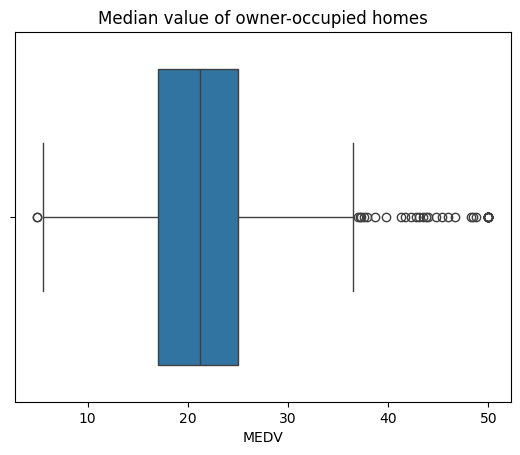

In [84]:
ax = sns.boxplot(x=boston_df['MEDV'])
ax.set_title("Median value of owner-occupied homes")

### Charles River
##### 1: Tract bounds river 0: Otherwise

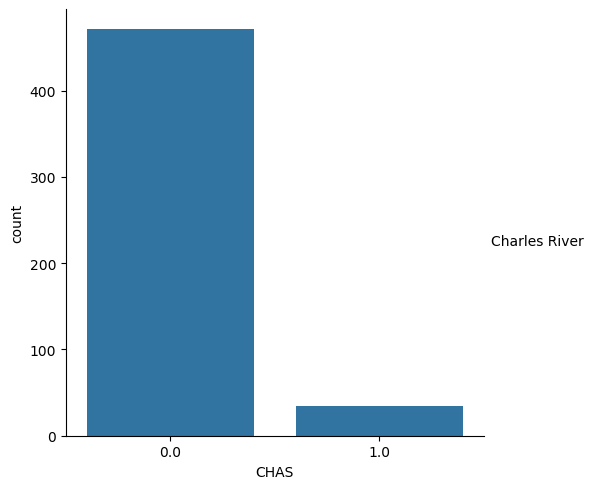

In [81]:
ax = sns.catplot(boston_df, x = 'CHAS', kind = 'count')
ax.add_legend(title = "Charles River")

Mayority tracts bounds the Charles River

### MEDV variable vs the AGE variable


(The age variable is discretized into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'MEDV variable vs the AGE variable')

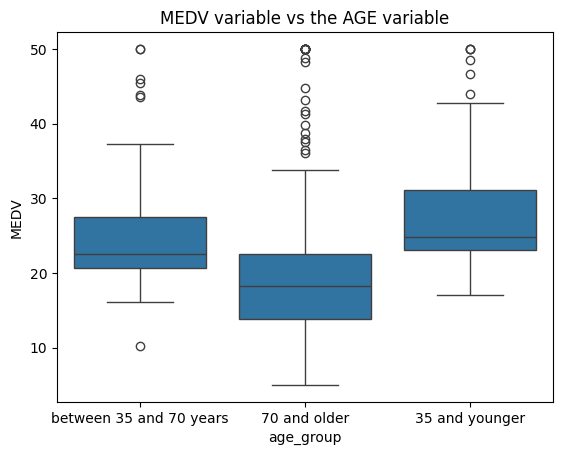

In [106]:
#dividing the data
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = "between 35 and 70 years"
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = "70 and older"

ax = sns.boxplot( x = "age_group", y="MEDV", data = boston_df)
ax.set_title("MEDV variable vs the AGE variable")

People who are 35 or younger, are the ones with the most value homes.

### Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

Text(0, 0.5, 'nitric oxides concentration (parts per 10 million)')

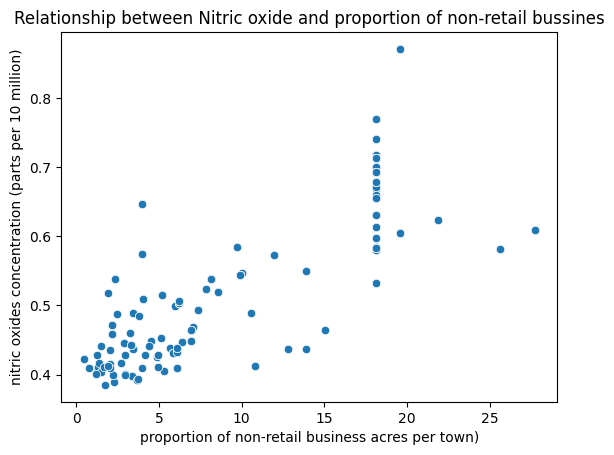

In [107]:
ax = sns.scatterplot(x= 'INDUS', y='NOX', data = boston_df)
ax.set_title("Relationship between Nitric oxide and proportion of non-retail bussines")
ax.set_xlabel( 'proportion of non-retail business acres per town)')
ax.set_ylabel( 'nitric oxides concentration (parts per 10 million)')

the nitric oxides concentratios incres as the proportion of non-retail bussiness acres in town do

### Pupil-teacher ratio by town

PTRATIO - pupil-teacher ratio by town)

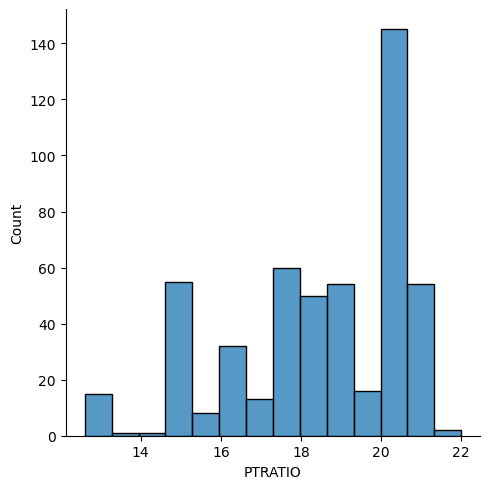

In [104]:
ax = sns.displot(boston_df['PTRATIO'], kde = False)

Most of the teachers hace a 1:20  ratio of students in the data

## Task 3: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### Hypothesis:
#### H0 = u1 =u2
#### H1: u1 != u2

In [108]:
import scipy.stats

In [109]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

p-value is lees than 0.05 then, we can't assume equality of variance

In [110]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Conclusion: Since the p-value is less than 0.05 we reject the null hypothesis as there is enough proof that there is a statistical difference in Median value of owner-occupied homes based on Charles river variable

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

#### Hypothesis:
#### H0: u1 =u2 = u3
#### H1: at leat one differ

In [113]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [118]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 and older']['MEDV']

In [119]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


*Conclusion:* Since the p-value is less than 0.05, we reject the null hypothesis as there is a significant evidence that at least one of the means differ.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

#### Hypothesis:
#### H0: both doesn't correlate
#### H1: both correlate

In [120]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

*Conclusion:* Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between NOX and INDUS.

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

#### Hypothesis:
#### H0: DIS is not correlated with MEDV
#### H1: DIS is correlated with MEDV

In [121]:

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        20:05:39   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

if we added an additional weight distance the values of the owner occupied homes may raise $188